# Predict a possible heart disease

In [2]:
!pip install scikit-learn
!pip install pandas numpy
!pip install --upgrade matplotlib

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import log_loss  

## Load The Dataset

In [4]:
# Load The Dataset
data = pd.read_csv(r"/Users/kk_yang/Desktop/M2S1/Fundamental of Machine Learning/Machine Learning Heart Disease/heart.csv")

In [5]:
# Basic Data Overview
print(data.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [6]:
# Checking for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [7]:
# Check for duplicate data
print(data.duplicated().sum())

0


In [8]:
# View basic information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


## Feature Engineering

In [9]:
# Define categorical and numerical columns
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [10]:
# Convert FastingBS to string (categorical type)
data['FastingBS'] = data['FastingBS'].astype(str)

In [11]:
# Verify the change
print(data['FastingBS'].dtypes)

object


In [12]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Apply one-hot encoding to the categorical columns


In [ ]:
encoded_categorical = encoder.fit_transform(data[categorical_cols])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols), index=data.index)

# Drop the original categorical columns from the dataset
data.drop(columns=categorical_cols, inplace=True)

# Combine the encoded features with the original dataset
data = pd.concat([data, encoded_df], axis=1)

In [13]:
# Drop the target variable 'HeartDisease' and create a feature list
feature_list = data.drop(columns=['HeartDisease']).columns.tolist()

# Print the feature list
print("Feature List:", feature_list)

Feature List: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'FastingBS_0', 'FastingBS_1', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']


In [14]:
# Initialize the standardization tool
scaler = StandardScaler()

# Standardize the numerical features
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [15]:
# Verify the results of standardization
print("\nNumerical columns mean and standard deviation after scaling:")
print("Means (should be approximately 0):")
print(data[numerical_cols].mean())
print("\nStandard deviations (should be approximately 1):")
print(data[numerical_cols].std())



Numerical columns mean and standard deviation after scaling:
Means (should be approximately 0):
Age           -1.083616e-16
RestingBP      1.954380e-16
Cholesterol    0.000000e+00
MaxHR          4.953675e-16
Oldpeak        1.238419e-16
dtype: float64

Standard deviations (should be approximately 1):
Age            1.000545
RestingBP      1.000545
Cholesterol    1.000545
MaxHR          1.000545
Oldpeak        1.000545
dtype: float64


In [16]:
# Final feature list
print("Final Feature List:")
print(feature_list)
# Display the first few rows of the processed data
print("Processed Training Data:")
print(data.head())

Final Feature List:
['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'FastingBS_0', 'FastingBS_1', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']
Processed Training Data:
        Age  RestingBP  Cholesterol     MaxHR   Oldpeak  HeartDisease  Sex_F  \
0 -1.433140   0.410909     0.825070  1.382928 -0.832432             0    0.0   
1 -0.478484   1.491752    -0.171961  0.754157  0.105664             1    1.0   
2 -1.751359  -0.129513     0.770188 -1.525138 -0.832432             0    0.0   
3 -0.584556   0.302825     0.139040 -1.132156  0.574711             1    1.0   
4  0.051881   0.951331    -0.034755 -0.581981 -0.832432             0    0.0   

   Sex_M  ChestPainType_ASY  ChestPainType_ATA  ...  FastingBS_0  FastingBS_1  \
0    1.0                0.0                1.0  ...          

## Model Training

#### Split the data into training and testing sets

In [17]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Ensure that `X` and `y` are already defined
X = data.drop(columns=['HeartDisease'])  # Feature data
y = data['HeartDisease']  # Target variable

# Convert categorical variables into numerical variables
X = pd.get_dummies(X, drop_first=True)

# Divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Recall parameter tuning

In [18]:
# Recall parameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

# Define the parameter grid
param_grid_recall = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2']  
}

# Initialize the Random Forest model with class balancing
rf_recall = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define the grid search
grid_search_recall = GridSearchCV(
    estimator=rf_recall,
    param_grid=param_grid_recall,
    scoring='recall',  # Use recall as the evaluation metric
    cv=5,  # Perform 5-fold cross-validation
    n_jobs=-1  # Use all available processors
)

# Train the model
grid_search_recall.fit(X_train, y_train)

# Output the best parameters and evaluation results
print("Best parameters for Recall Rate:", grid_search_recall.best_params_)
print("Best Recall Rate Score (CV):", grid_search_recall.best_score_)

Best parameters for Recall Rate: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Recall Rate Score (CV): 0.9177469135802468


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Use the best parameters from Recall Rate optimization
best_params_recall = {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

# Build the model
model_recall = RandomForestClassifier(
    max_depth=best_params_recall['max_depth'],  # Maximum depth of the tree
    max_features=best_params_recall['max_features'],  # Number of features to consider for the best split
    min_samples_leaf=best_params_recall['min_samples_leaf'],  # Minimum samples required at a leaf node
    min_samples_split=best_params_recall['min_samples_split'],  # Minimum samples required to split a node
    n_estimators=best_params_recall['n_estimators'],  # Number of trees in the forest
    random_state=42,  # Random seed for reproducibility
    class_weight='balanced'  # Handle imbalanced data by balancing class weights
)

# Train the model
model_recall.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_recall = model_recall.predict(X_test)  # Predicted classes
y_pred_proba_recall = model_recall.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Output the classification report
print("Classification Report for Recall Rate Optimized Model:")
print(classification_report(y_test, y_pred_recall))

# Calculate and output comprehensive metrics
accuracy = accuracy_score(y_test, y_pred_recall)  # Accuracy of the model
precision = precision_score(y_test, y_pred_recall)  # Precision of the model
recall = recall_score(y_test, y_pred_recall)  # Recall of the model
f1 = f1_score(y_test, y_pred_recall)  # F1 score of the model
roc_auc = roc_auc_score(y_test, y_pred_proba_recall)  # ROC-AUC score for probabilistic predictions

print("\nComprehensive Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Classification Report for Recall Rate Optimized Model:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        77
           1       0.91      0.90      0.91       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184


Comprehensive Metrics:
Accuracy: 0.8913
Precision: 0.9143
Recall: 0.8972
F1 Score: 0.9057
ROC-AUC: 0.9474


### Feature Importance Analysis

Feature Importances:
              Feature  Importance
20        ST_Slope_Up    0.143207
19      ST_Slope_Flat    0.105502
2         Cholesterol    0.092702
4             Oldpeak    0.090207
17   ExerciseAngina_Y    0.087352
3               MaxHR    0.078923
16   ExerciseAngina_N    0.077470
7   ChestPainType_ASY    0.066619
0                 Age    0.063591
1           RestingBP    0.049866
6               Sex_M    0.028524
5               Sex_F    0.018800
8   ChestPainType_ATA    0.018288
11        FastingBS_0    0.015261
12        FastingBS_1    0.013431
9   ChestPainType_NAP    0.011476
13     RestingECG_LVH    0.009384
14  RestingECG_Normal    0.008831
15      RestingECG_ST    0.008324
18      ST_Slope_Down    0.007715
10   ChestPainType_TA    0.004529


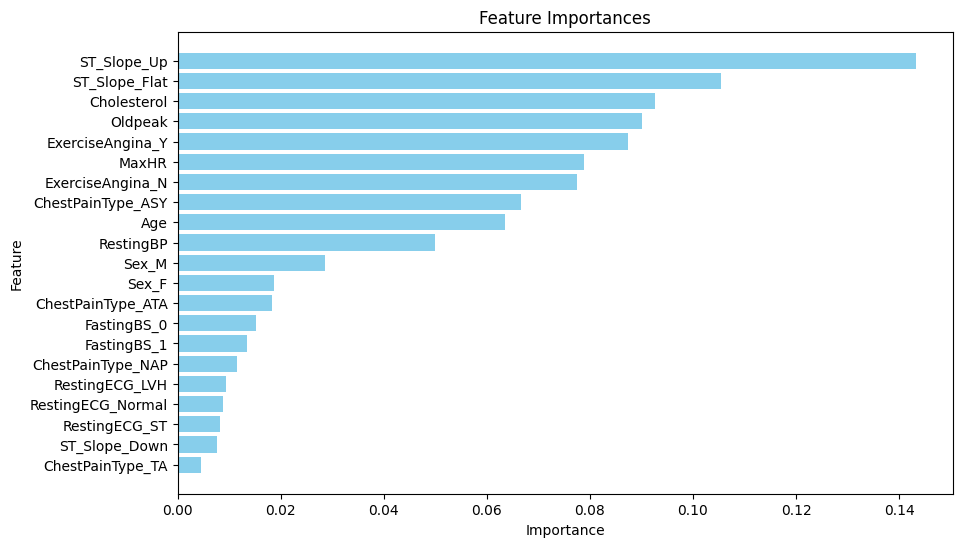

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = model_recall.feature_importances_  # Extract feature importance scores
feature_names = X_train.columns  # Get feature names from training data

# Combine features and their importance into a DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,  # Feature names
    'Importance': feature_importances  # Corresponding importance scores
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Output the feature importance table
print("Feature Importances:")
print(importance_df)

# Visualize feature importances
plt.figure(figsize=(10, 6))  # Set figure size
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')  # Horizontal bar chart
plt.xlabel('Importance')  # Label for x-axis
plt.ylabel('Feature')  # Label for y-axis
plt.title('Feature Importances')  # Title of the chart
plt.gca().invert_yaxis()  # Reverse the y-axis to show the most important features at the top
plt.show()

### Optimizing a Random Forest Classifier with a Custom Scoring Function

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Combined Score (CV): 0.9123005923340276

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        77
           1       0.91      0.90      0.91       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184


Test Metrics:
Recall: 0.8972
F1 Score: 0.9057
ROC-AUC: 0.9474

Feature Importances:
              Feature  Importance
20        ST_Slope_Up    0.143207
19      ST_Slope_Flat    0.105502
2         Cholesterol    0.092702
4             Oldpeak    0.090207
17   ExerciseAngina_Y    0.087352
3               MaxHR    0.078923
16   ExerciseAngina_N    0.077470
7   ChestPainType_ASY    0.066619
0                 Age    0.063591
1           RestingBP    0.049866
6               Se

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


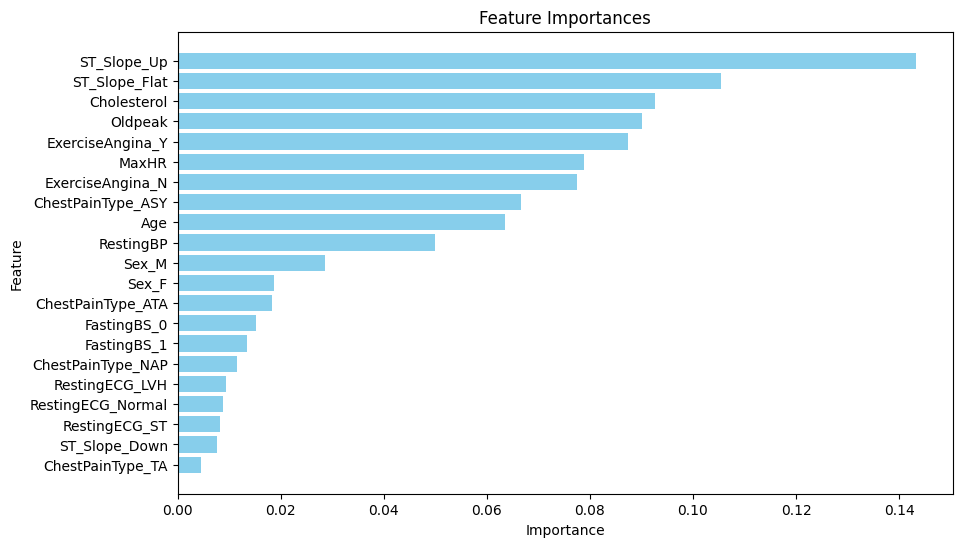

In [29]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

# Prepare features (X) and target (y)
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a custom scoring function
def custom_score(y_true, y_pred, y_proba):
    """
    Custom scoring function that combines Recall, F1-score, and ROC-AUC.
    Args:
        y_true (array): True labels
        y_pred (array): Predicted labels
        y_proba (array): Predicted probabilities (for ROC-AUC)
    Returns:
        float: Weighted combined score
    """
    # Calculate individual metrics
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)

    # Define weights for each metric
    w_recall = 0.4
    w_f1 = 0.3
    w_roc_auc = 0.3

    # Combine metrics with weights
    combined_score = w_recall * recall + w_f1 * f1 + w_roc_auc * roc_auc
    return combined_score

# Custom scorer for GridSearchCV
class WeightedScorer:
    def __init__(self, estimator=None):
        self.estimator = estimator

    def __call__(self, estimator, X, y):
        y_pred = estimator.predict(X)
        y_proba = estimator.predict_proba(X)[:, 1]  # Use probabilities for ROC-AUC
        return custom_score(y, y_pred, y_proba)

# Create a scorer instance
custom_scorer = WeightedScorer()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Create a GridSearchCV object with the custom scorer
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring=custom_scorer,  # Use custom scorer
    cv=5,
    n_jobs=-1
)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Combined Score (CV):", best_score)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Classification report and metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate individual metrics on the test set
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("\nTest Metrics:")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Feature importance analysis
feature_importances = best_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)

# Visualize feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()